<a href="https://colab.research.google.com/github/rawanessam-19/Udemy-Clone-Assignment-final/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mohammed-Taher6705/jigsaw-puzzle-matching.git


Cloning into 'jigsaw-puzzle-matching'...
remote: Enumerating objects: 1227, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1227 (delta 15), reused 13 (delta 13), pack-reused 1206 (from 2)
Receiving objects: 100% (1227/1227), 139.67 MiB | 23.48 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cell 1: find the zip in Google Drive folder and unzip
import os
from pprint import pprint

base_folder = "/content/jigsaw-puzzle-matching"

zip_candidates = [f for f in os.listdir(base_folder) if f.lower().endswith(".zip")]
print("Zip files found in", base_folder, ":\n", zip_candidates)

if not zip_candidates:
    raise FileNotFoundError("No .zip found in your Drive folder.")

zip_name = zip_candidates[0]
zip_path = os.path.join(base_folder, zip_name)
print("Using zip:", zip_path)

extract_to = os.path.join(base_folder, "dataset")

!unzip -q "{zip_path}" -d "{extract_to}"
print("Unzipped to:", extract_to)

print("\nTop-level entries under the extraction folder:")
pprint(sorted(os.listdir(extract_to)))


Zip files found in /content/jigsaw-puzzle-matching :
 ['Dataset.zip', 'Task2_output.zip', 'Task3_output.zip', 'Task1_output.zip']
Using zip: /content/jigsaw-puzzle-matching/Dataset.zip
Unzipped to: /content/jigsaw-puzzle-matching/dataset

Top-level entries under the extraction folder:
['Dataset']


In [4]:
# Cell 2: detect dataset root that contains expected folders
import os

expected = {"correct", "puzzle_2x2", "puzzle_4x4", "puzzle_8x8"}

def has_expected(root):
    if not os.path.isdir(root):
        return False
    entries = set([
        name for name in os.listdir(root)
        if os.path.isdir(os.path.join(root, name))
    ])
    return expected.issubset(entries)


EXTRACT_TO = "/content/jigsaw-puzzle-matching/dataset/Dataset"

candidates = [EXTRACT_TO] + [
    os.path.join(EXTRACT_TO, x)
    for x in os.listdir(EXTRACT_TO)
    if os.path.isdir(os.path.join(EXTRACT_TO, x))
]

BASE_PATH = None
for c in candidates:
    if has_expected(c):
        BASE_PATH = c
        break

if BASE_PATH is None:
    print("Could not find all expected folders (correct, puzzle_2x2, puzzle_4x4, puzzle_8x8).")
    print("Contents of extraction folder:")
    print(sorted(os.listdir(EXTRACT_TO)))
    raise FileNotFoundError("Please inspect the contents and ensure the zip contains the expected folders.")
else:
    print("Detected dataset BASE_PATH:", BASE_PATH)
    print("Contents:")
    print(sorted(os.listdir(BASE_PATH)))


Detected dataset BASE_PATH: /content/jigsaw-puzzle-matching/dataset/Dataset
Contents:
['correct', 'puzzle_2x2', 'puzzle_4x4', 'puzzle_8x8']


In [5]:
## CELL 3 — Load images from each folder (JPG only)

import cv2
import os
from glob import glob

paths = {
    "correct":      os.path.join(BASE_PATH, "correct"),
    "puzzle_2x2":   os.path.join(BASE_PATH, "puzzle_2x2"),
    "puzzle_4x4":   os.path.join(BASE_PATH, "puzzle_4x4"),
    "puzzle_8x8":   os.path.join(BASE_PATH, "puzzle_8x8"),
}

def load_images_from_folder(folder_path):
    image_paths = sorted(glob(os.path.join(folder_path, "*.jpg")))
    images = []
    for p in image_paths:
        img = cv2.imread(p)
        if img is not None:
            images.append((os.path.basename(p), img, p))
    return images

datasets = {}
for name, path in paths.items():
    if os.path.isdir(path):
        datasets[name] = load_images_from_folder(path)
    else:
        datasets[name] = []
    print(f"{name}: {len(datasets[name])} images loaded.")


correct: 0 images loaded.
puzzle_2x2: 110 images loaded.
puzzle_4x4: 110 images loaded.
puzzle_8x8: 110 images loaded.



Processing: puzzle_2x2
 sample: 0.jpg


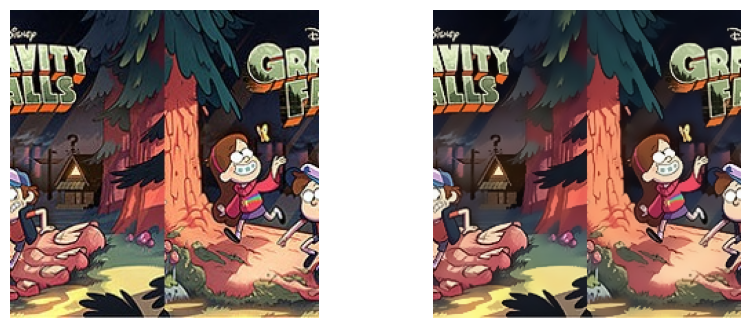


Processing: puzzle_4x4
 sample: 0.jpg


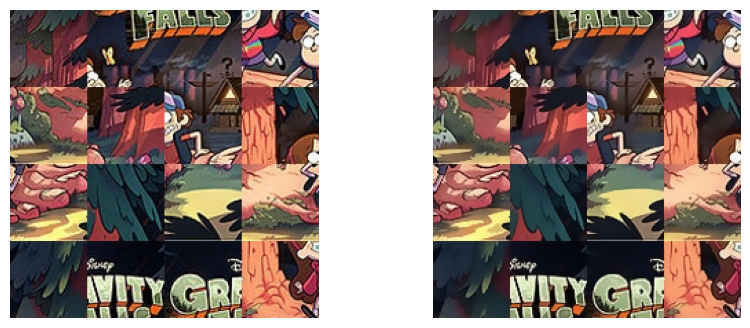


Processing: puzzle_8x8
 sample: 0.jpg


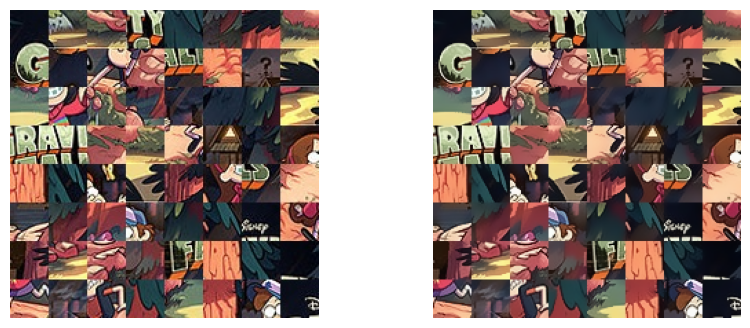

In [8]:
# Task-1: Bilateral Filter

import os, shutil, cv2
from glob import glob
import matplotlib.pyplot as plt

DATASET_ROOT="/content/jigsaw-puzzle-matching/dataset/Dataset"
OUTPUT_ROOT="/content/dataset_filtered"
PUZZLE=["puzzle_2x2","puzzle_4x4","puzzle_8x8"]

if os.path.exists(OUTPUT_ROOT):
    shutil.rmtree(OUTPUT_ROOT)
os.makedirs(OUTPUT_ROOT)

for split in PUZZLE:
    print("\nProcessing:", split)

    src = os.path.join(DATASET_ROOT, split)
    dst = os.path.join(OUTPUT_ROOT, split)
    os.makedirs(dst, exist_ok=True)

    files = sorted(glob(os.path.join(src, "*.jpg")))
    printed = False

    for p in files:
        img = cv2.imread(p)
        if img is None:
            continue


        denoised = cv2.bilateralFilter(img, d=9, sigmaColor=50, sigmaSpace=50)

        outp = os.path.join(dst, os.path.basename(p))
        cv2.imwrite(outp, denoised)

        if not printed:
            print(" sample:", os.path.basename(p))
            plt.figure(figsize=(10,4))
            plt.subplot(1,2,1); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis("off")
            plt.subplot(1,2,2); plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)); plt.axis("off")

            figpath = os.path.join(dst,
                                   os.path.splitext(os.path.basename(p))[0] +
                                   "_before_after.png")

            plt.savefig(figpath, dpi=200, bbox_inches="tight")
            plt.show()
            plt.close()

            printed = True


In [9]:
!zip -r /content/output_Task1.zip /content/dataset_filtered


  adding: content/dataset_filtered/ (stored 0%)
  adding: content/dataset_filtered/puzzle_8x8/ (stored 0%)
  adding: content/dataset_filtered/puzzle_8x8/37.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/23.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/104.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/90.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/50.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/30.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/72.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/106.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/54.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/51.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/49.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/107.jpg (deflated 1%)
  adding: content/dataset_filtered/puzzle_8x8/52.jpg (deflated 1%)
  adding: content/d